# 4. Marketing Campaign Analysis with Clusters

In [1]:
import pandas as pd

In [2]:
# For visualizations
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import plotly.express as px

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (12., 5.)})
sns.set_style('whitegrid')
pal = ["#c6ff33","#41b6c4", "#225ea8","#081d58"]

In [3]:
df = pd.read_csv('../Data/data_mktg_with_clusters.csv', encoding = "ISO-8859-1")

In [4]:
df.sample()

,Income,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Cluster
1640,75774.0,0,0,0,0,0,0,0


In [16]:
df.shape

(2236, 7)

In [5]:
# First, let's remove the 'Income' column which was added to check the clusters and the data was in the same order as the rest of datasets
df.drop(columns = 'Income', inplace = True)

In [6]:
df.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Cluster
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,3


In [7]:
# I want to know the total number of people who has accepted the marketing campaigns per cluster and per campaign
df_graph = df.groupby(['Cluster']).agg({'AcceptedCmp1': 'sum', 'AcceptedCmp2': 'sum', 'AcceptedCmp3': 'sum', 'AcceptedCmp4': 'sum', 'AcceptedCmp5': 'sum', 'Response': 'sum'})
df_graph

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
Cluster,,,,,,
0,110,14,38,60,135,142
1,1,2,64,11,0,71
2,24,13,41,60,27,63
3,9,1,20,36,0,58


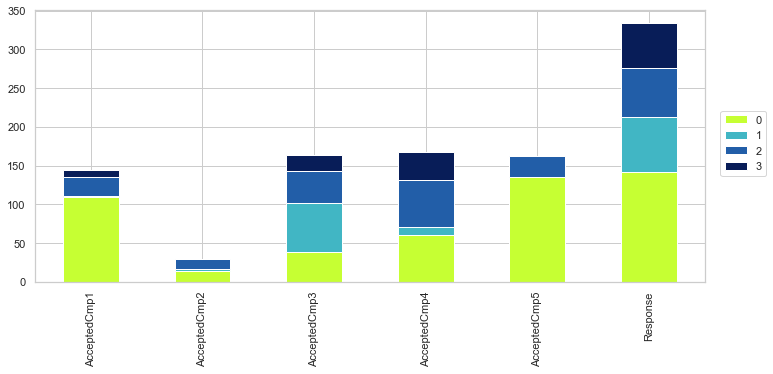

In [68]:
df_graph0 = df_graph.transpose()
df_graph0.plot(kind='bar', color = ["#c6ff33","#41b6c4", "#225ea8","#081d58"], stacked=True)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 0.65))
plt.show()

In the graph above we can see that the most successful campaign is the latest one, as it has had the highest number of responses, the double than the rest of the campaigns. On the other hand, the second campaign has been the least successful.

Also, the cluster who usually respond more to the campaigns is the most loyal cluster (#0 or Super Client), followed by the 'Good Client' cluster. 

If we take a look at cluster 'Casual Client' (1), they have responded to campaigns #3 and the latest one, something to consider for the future in order to engage with this casual client.

In [10]:
df_graph0

Cluster,0,1,2,3
AcceptedCmp1,110,1,24,9
AcceptedCmp2,14,2,13,1
AcceptedCmp3,38,64,41,20
AcceptedCmp4,60,11,60,36
AcceptedCmp5,135,0,27,0
Response,142,71,63,58


In [15]:
df_graph1 = df_graph0.copy()
df_graph1['Total'] = df_graph1[0] + df_graph1[1] + df_graph1[2] + df_graph1[3]
df_graph1

Cluster,0,1,2,3,Total
AcceptedCmp1,110,1,24,9,144
AcceptedCmp2,14,2,13,1,30
AcceptedCmp3,38,64,41,20,163
AcceptedCmp4,60,11,60,36,167
AcceptedCmp5,135,0,27,0,162
Response,142,71,63,58,334


In [29]:
df_graph1['%ofCmpAcceptance'] = round(df_graph1['Total'] / df.shape[0] * 100, 1)
df_graph1

Cluster,0,1,2,3,Total,%ofCmpAcceptance
AcceptedCmp1,110,1,24,9,144,6.4
AcceptedCmp2,14,2,13,1,30,1.3
AcceptedCmp3,38,64,41,20,163,7.3
AcceptedCmp4,60,11,60,36,167,7.5
AcceptedCmp5,135,0,27,0,162,7.2
Response,142,71,63,58,334,14.9


'%ofCmpAcceptance' column gives me the total % of acceptance each campaign has had over my total customer base. The latest campaign has been highly successful having 2x level of responses than the rest.

In [11]:
df_graph2 = df_graph0[[0,1,2,3]].apply(lambda x: round(x/x.sum(), 2), axis=1)
df_graph2

Cluster,0,1,2,3
AcceptedCmp1,0.76,0.01,0.17,0.06
AcceptedCmp2,0.47,0.07,0.43,0.03
AcceptedCmp3,0.23,0.39,0.25,0.12
AcceptedCmp4,0.36,0.07,0.36,0.22
AcceptedCmp5,0.83,0.00,0.17,0.00
Response,0.43,0.21,0.19,0.17


In [67]:
df['Cluster'].value_counts()

1    927
0    501
2    466
3    342
Name: Cluster, dtype: int64

In [71]:
df_graph4 = df_graph0.copy()

In [72]:
df_graph4['0_AcceptCamp%'] = round((df_graph4[0] / 501) * 100, 2)
df_graph4['1_AcceptCamp%'] = round((df_graph4[1] / 927) * 100, 2)
df_graph4['2_AcceptCamp%'] = round((df_graph4[2] / 466) * 100, 2)
df_graph4['3_AcceptCamp%'] = round((df_graph4[3] / 342) * 100, 2)

In [73]:
df_graph4 = df_graph4[['0_AcceptCamp%', '1_AcceptCamp%', '2_AcceptCamp%', '3_AcceptCamp%']]
df_graph4

Cluster,0_AcceptCamp%,1_AcceptCamp%,2_AcceptCamp%,3_AcceptCamp%
AcceptedCmp1,21.96,0.11,5.15,2.63
AcceptedCmp2,2.79,0.22,2.79,0.29
AcceptedCmp3,7.58,6.90,8.80,5.85
AcceptedCmp4,11.98,1.19,12.88,10.53
AcceptedCmp5,26.95,0.00,5.79,0.00
Response,28.34,7.66,13.52,16.96


Finally, let's look at the % of acceptance per cluster and per campaign, we can clearly see again that the most receptive cluster is the 'Super Client'. Also, in the latest campaign we have reached the highest acceptance % across all clusters. 